In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
%matplotlib inline

In [2]:
CS137Peaks = np.array([416.77])
CS137Energy = np.array([662]) #KeV

In [3]:
BA133Peaks = np.array([224.5,189.14,55.23])
BA133Energy = np.array([356,303,81])

In [4]:
CO60Peaks = np.array([809.59,714.21])
CO60Energy = np.array([1333,1173])

In [5]:
Peaks = np.hstack([CS137Peaks,BA133Peaks,CO60Peaks])

In [6]:
Peaks

array([ 416.77,  224.5 ,  189.14,   55.23,  809.59,  714.21])

In [7]:
Energy = np.hstack([CS137Energy,BA133Energy,CO60Energy])

In [8]:
Energy

array([ 662,  356,  303,   81, 1333, 1173])

In [9]:
UnknownPeaks = np.array([786.45,323.39,123.85])

(array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.]),
 <a list of 8 Text yticklabel objects>)

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


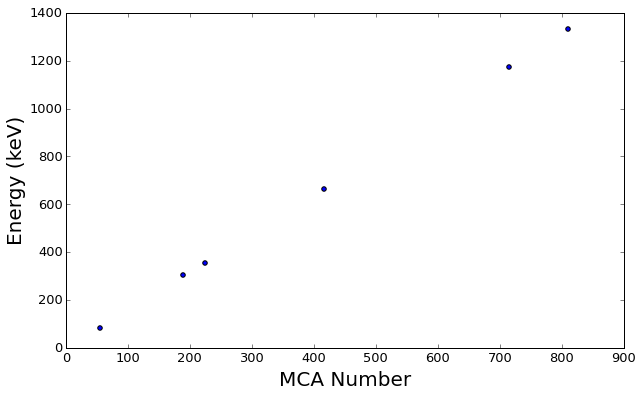

In [10]:
plt.figure(figsize=(10,6));
plt.scatter(Peaks,Energy);

plt.xlabel('MCA Number',fontsize=20);
plt.ylabel('Energy (keV)',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
#plt.savefig('Sample')

In [11]:
def myfun(N,a,b,c):
    ans = a + b*N + c*N**2  # this is y, "the function to be fit"
    return ans

In [12]:
p0 = [-2,1,0]

In [13]:
xlots = np.linspace(0,910)  # need lots of data points for smooth curve
yfit = np.zeros((len(Peaks),xlots.size))

plsq, pcov = curve_fit(myfun, Peaks, Energy, p0)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
a = plsq[0]
ea = np.sqrt(pcov[0,0])
b = plsq[1]
eb = np.sqrt(pcov[1,1])
c = plsq[2]
ec = np.sqrt(pcov[2,2])

yfit = myfun(xlots,plsq[0],plsq[1],plsq[2])  # use fit results for a, b, c
    
print('a = %.7f +/- %.7f' % (plsq[0], np.sqrt(pcov[0,0])))
print('b = %.7f +/- %.7f' % (plsq[1], np.sqrt(pcov[1,1])))
print('c = %.7f +/- %.7f' % (plsq[2], np.sqrt(pcov[2,2])))

a = -2.3237904 +/- 6.9284232
b = 1.5636096 +/- 0.0420454
c = 0.0001082 +/- 0.0000461


### 1

(array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.]), <a list of 9 Text yticklabel objects>)

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


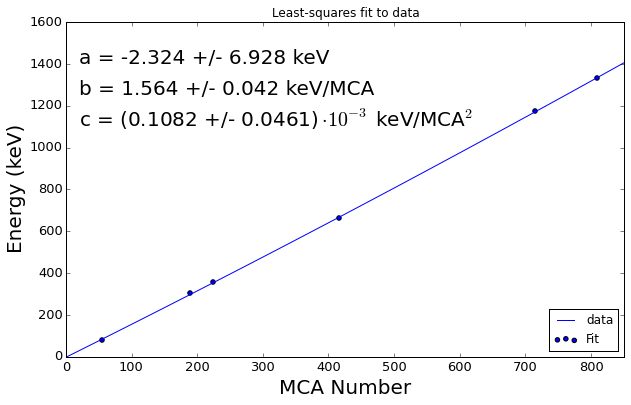

In [14]:
plt.figure(figsize=(10,6));
plt.scatter(Peaks,Energy);
plt.xlim(0,850)
plt.ylim(0,1600)
plt.xlabel('x (mm)');
plt.ylabel('y (mm)');
plt.plot(xlots,yfit);
plt.title('Least-squares fit to data');
plt.legend(['data','Fit'],loc='lower right');
plt.text(20,1400,'a = %.3f +/- %.3f keV' % (plsq[0], np.sqrt(pcov[0,0])),size=20)
plt.text(20,1250,'b = %.3f +/- %.3f keV/MCA' % (plsq[1], np.sqrt(pcov[1,1])),size=20)
plt.text(20,1100,'c = (%.4f +/- %.4f)$\cdot 10^{-3}$ keV/MCA$^{2}$' % (plsq[2]*1e3, np.sqrt(pcov[2,2])*1e3),size=20)
plt.xlabel('MCA Number',fontsize=20);
plt.ylabel('Energy (keV)',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
#plt.savefig('Sample')

### 2

In [15]:
E_calc = np.array([myfun(entry,a,b,c) for entry in Peaks])

In [16]:
delta_E = np.mean(np.array([abs(E_calc[i] - Energy[i]) for i in np.arange(len(E_calc))]))
delta_E

3.6514411763655139

### 3

In [17]:
CS137Energy[0]

662

In [18]:
E_calc[0]

668.131030809398

In [19]:
myfun(416.77+22.48/2,a,b,c) - myfun(416.77-22.48/2,a,b,c)

37.176875180458865

In [20]:
myfun(291,a,b,c)

461.84675487365394

In [21]:
myfun(130.25,a,b,c)

203.17151562419369

### 6

In [22]:
#All in channels
CSfwhm = np.array([22.48])

BAfwhm = np.array([17.03,14,6.2])

COfwhm = np.array([32.1, 30.71])

In [23]:
fwhmChannels = np.hstack([CSfwhm,BAfwhm,COfwhm])

In [24]:
fwhmEnergy = np.array([abs(myfun(Peaks[i] + fwhmChannels[i]/2,a,b,c) - myfun(Peaks[i] - fwhmChannels[i]/2,a,b,c)) for i in np.arange(len(Peaks))])

In [25]:
fwhmEnergy

array([ 37.17687518,  27.45540851,  22.46340688,   9.76846181,
        55.81419842,  52.76362264])

(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 7 Text yticklabel objects>)

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


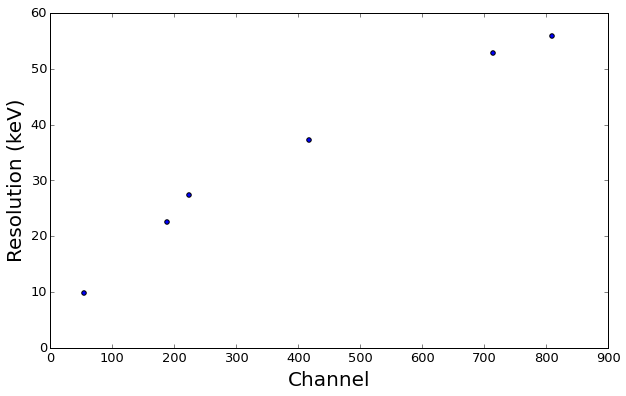

In [26]:
plt.figure(figsize=(10,6));
plt.scatter(Peaks,fwhmEnergy);

plt.xlabel('Channel',fontsize=20);
plt.ylabel('Resolution (keV)',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
#plt.savefig('Sample')

### 7

In [27]:
def myfun2(E,a,x):
    ans = a*E**x  # this is y, "the function to be fit"
    return ans

In [28]:
p02 = [2,1/2]

In [29]:
xlots2 = np.linspace(0,910)  # need lots of data points for smooth curve
yfit2 = np.zeros((len(Peaks),xlots.size))

plsq, pcov = curve_fit(myfun2, Peaks, fwhmEnergy, p02)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
a = plsq[0]
ea = np.sqrt(pcov[0,0])
x = plsq[1]
ex = np.sqrt(pcov[1,1])


yfit2 = myfun2(xlots2,plsq[0],plsq[1])  # use fit results for a, b, c
    
print('a = %.7f +/- %.7f' % (plsq[0], np.sqrt(pcov[0,0])))
print('x = %.7f +/- %.7f' % (plsq[1], np.sqrt(pcov[1,1])))

a = 0.9256346 +/- 0.1374865
x = 0.6137374 +/- 0.0234017


(array([   0.,   20.,   40.,   60.,   80.,  100.]),
 <a list of 6 Text yticklabel objects>)

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


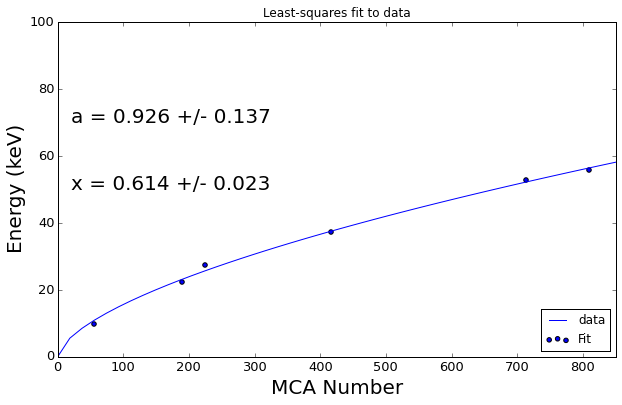

In [30]:
plt.figure(figsize=(10,6));
plt.scatter(Peaks,fwhmEnergy);
plt.xlim(0,850)
plt.ylim(0,100)
plt.xlabel('x (mm)');
plt.ylabel('y (mm)');
plt.plot(xlots2,yfit2);
plt.title('Least-squares fit to data');
plt.legend(['data','Fit'],loc='lower right');
plt.text(20,70,'a = %.3f +/- %.3f' % (plsq[0], np.sqrt(pcov[0,0])),size=20)
plt.text(20,50,'x = %.3f +/- %.3f' % (plsq[1], np.sqrt(pcov[1,1])),size=20)
plt.xlabel('MCA Number',fontsize=20);
plt.ylabel('Energy (keV)',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
#plt.savefig('Sample')

### 8

In [31]:
myfun(786.45,a,b,c)

1297.5313989103347

In [32]:
myfun(323.39,a,b,c)

517.89413509802637

In [33]:
myfun(123.85,a,b,c)

196.2379248174077